In [78]:
import os
for dirname, _, filenames in os.walk('/Volumes/One Touch/neu-csa/cs5002/Final Project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/Volumes/One Touch/neu-csa/cs5002/Final Project/._train.csv
/Volumes/One Touch/neu-csa/cs5002/Final Project/test.csv
/Volumes/One Touch/neu-csa/cs5002/Final Project/train.csv
/Volumes/One Touch/neu-csa/cs5002/Final Project/CS5002 final_project_proposal.docx
/Volumes/One Touch/neu-csa/cs5002/Final Project/._CS5002 final_project_proposal.docx
/Volumes/One Touch/neu-csa/cs5002/Final Project/CS5002 final_project_proposal.pdf
/Volumes/One Touch/neu-csa/cs5002/Final Project/._test.csv


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [80]:
trainorg=pd.read_csv("/Volumes/One Touch/neu-csa/cs5002/Final Project/train.csv")
testorg=pd.read_csv("/Volumes/One Touch/neu-csa/cs5002/Final Project/test.csv")
train = trainorg.copy()
test = testorg.copy()

In [81]:
train.reset_index(drop=True)
test.reset_index(drop=True)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [82]:
train.loc[(train["lot_size_units"]=="sqft"),"lot_size"]=train["lot_size"]* 0.092
train.loc[(train["lot_size_units"]=="acre"),"lot_size"]=train["lot_size"]* 4046.8
train["lot_size_units"]=train["lot_size_units"].replace({"sqft":"sqmeter","acre":"sqmeter"})
train.loc[(train["size_units"]=="sqft"),"size"]=train["size"]* 0.092 # sqfeet to sqmeter
train.loc[(train["size_units"]=="acre"),"size"]=train["size"]* 4046  # acre to sqmeter
train["size_units"]=train["size_units"].replace({"sqft":"sqmeter","acre":"sqmeter"})
test.loc[(test["lot_size_units"]=="sqft"),"lot_size"]=train["lot_size"]* 0.092
test.loc[(test["lot_size_units"]=="acre"),"lot_size"]=train["lot_size"]* 4046
test["lot_size_units"]=test["lot_size_units"].replace({"sqft":"sqmeter","acre":"sqmeter"})
test.loc[(test["size_units"]=="sqft"),"size"]=test["size"]* 0.092
test.loc[(test["size_units"]=="acre"),"size"]=test["size"]* 4046
test["size_units"]=test["size_units"].replace({"sqft":"sqmeter","acre":"sqmeter"})

In [83]:
train = train.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)

In [84]:
train.drop(columns=["zip_code","size_units","lot_size_units"],axis=1,inplace=True)
test.drop(columns=["zip_code","size_units","lot_size_units"],axis=1,inplace=True)

In [85]:
train.corr() # corr between features

,beds,baths,size,lot_size,price
beds,1.000000,0.594475,0.727881,-0.069410,0.233960
baths,0.594475,1.000000,0.621292,-0.048162,0.271502
size,0.727881,0.621292,1.000000,-0.060378,0.402324
lot_size,-0.069410,-0.048162,-0.060378,1.000000,-0.029097
price,0.233960,0.271502,0.402324,-0.029097,1.000000


In [86]:
correlation = train.corr()
fig = px.imshow(correlation,text_auto=True)
fig.show()

In [87]:
fig = px.scatter(train, x="price", y="beds", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),trendline_color_override="black",
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [88]:
# fig = px.scatter(train, x="price", y="lot_size", log_x=True, 
#                  trendline="ols", trendline_options=dict(log_x=True),
#                  title="Log-scaled X axis and log-transformed fit")
# fig.show()
from scipy.stats import skew
skewness = skew(train['lot_size'])
print(f"lot_size Skewness: {skewness}")
mean = np.mean(train['lot_size'])
median = np.median(train['lot_size'])
std = np.std(train['lot_size'])

print(f"Mean: {mean}, Median: {median}, Standard deviation: {std}")
skewness = skew(train['size'])
print(f"size Skewness: {skewness}")
skewness = skew(train['price'])
print(f"price Skewness: {skewness}")
skewness = skew(train['beds'])
print(f"beds Skewness: {skewness}")
skewness = skew(train['baths'])
print(f"baths Skewness: {skewness}")


lot_size Skewness: 34.285691966553095
Mean: 1742.1289203115643, Median: 460.0, Standard deviation: 26754.179891461812
size Skewness: 1.8748614016413447
price Skewness: 16.591157923530268
beds Skewness: 1.653326199542834
baths Skewness: 1.2088113035164068


<AxesSubplot:xlabel='lot_size', ylabel='Count'>

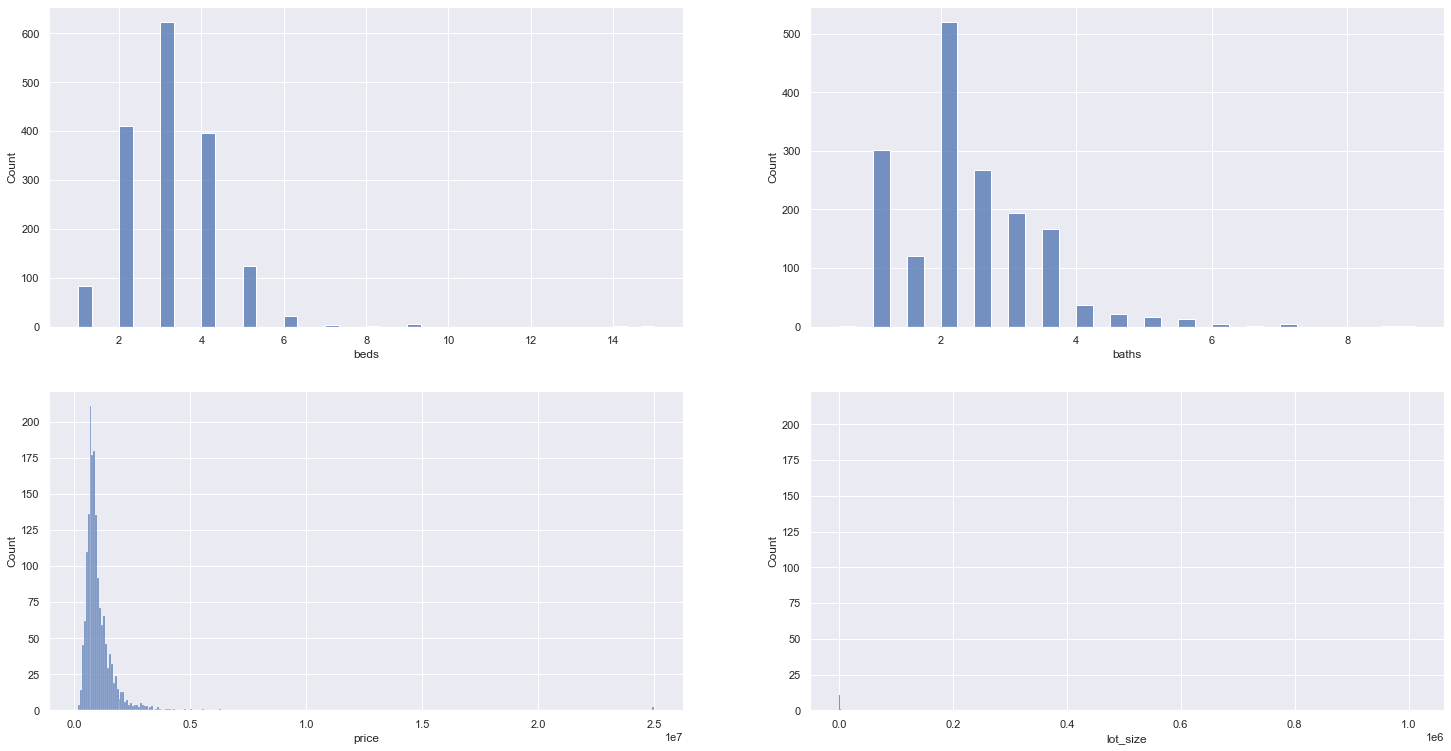

In [89]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(train['beds'], kde = False)

plt.subplot(3,2,2)
sns.histplot(train['baths'], kde = False)

plt.subplot(3,2,3)
sns.histplot(train['price'], kde = False)

plt.subplot(3,2,4)
sns.histplot(train['lot_size'], kde = False)

<AxesSubplot:title={'center':'Boxplot Price'}, xlabel='price'>

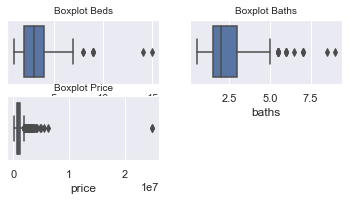

In [91]:
plt.subplot(3,2,1) 
plt.title("Boxplot Beds", fontdict = {'fontsize': 10}) 
sns.boxplot(x=train["beds"])

plt.subplot(3,2,2) 
plt.title("Boxplot Baths", fontdict = {'fontsize': 10}) 
sns.boxplot(x=train["baths"])

plt.subplot(3,2,3)
plt.title("Boxplot Price", fontdict = {'fontsize': 10}) 
sns.boxplot(x=train["price"])


###Outlier

In [92]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

clf.fit_predict(train)

train_scores = clf.negative_outlier_factor_

np.sort(train_scores) [0:20] 

array([-40.59151266, -32.53563647, -32.53563646, -19.30934253,
        -9.88869708,  -9.70390197,  -9.42311586,  -9.36885318,
        -9.0588714 ,  -8.92465065,  -8.88176468,  -8.88176468,
        -8.67389105,  -8.48629203,  -8.41230909,  -8.31297105,
        -8.27910809,  -8.27910385,  -8.13230955,  -8.06837363])

In [93]:
threshold_value = np.sort(train_scores)[13]
threshold_value

-8.48629202717843

In [94]:
contrary_train = train_scores < threshold_value
np.count_nonzero(contrary_train)

13

In [95]:
new_train = train[train_scores > threshold_value].reset_index(drop=True)
new_train

,beds,baths,size,lot_size,price
0,3,2.5,238.28,552.000,795000.0
1,4,2.0,206.08,1254.508,915000.0
2,4,3.0,187.68,348.036,950000.0
3,4,3.0,349.60,476.100,1950000.0
4,2,2.0,109.48,4046.800,740000.0
...,...,...,...,...,...
1650,3,3.5,154.56,136.712,675000.0
1651,2,2.0,128.80,1375.912,699950.0
1652,3,2.0,126.04,2023.400,910000.0
1653,4,2.0,196.88,575.000,1150000.0


In [96]:
train[train_scores < threshold_value]

,beds,baths,size,lot_size,price
120,3,3.0,140.760,207.920,745000.0
276,3,2.0,200.560,344.080,1012000.0
285,2,2.0,110.400,114.724,705000.0
324,5,2.5,200.560,374.348,1009975.0
498,2,2.0,118.496,493.580,755000.0
554,4,2.5,166.152,460.000,745000.0
632,1,1.0,23.000,1011700.000,159000.0
671,4,2.0,264.040,9186.236,703500.0
1011,1,1.0,51.888,404680.000,602000.0
1127,2,1.0,67.160,570.400,25000000.0


<AxesSubplot:title={'center':'Boxplot Price Without Outliers'}, xlabel='price'>

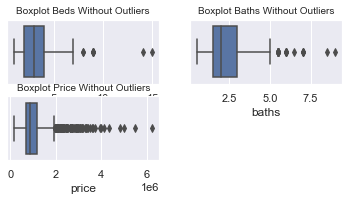

In [97]:

plt.subplot(3,2,1) 
plt.title("Boxplot Beds Without Outliers", fontdict = {'fontsize': 10}) 
sns.boxplot(x=new_train["beds"])

plt.subplot(3,2,2) 
plt.title("Boxplot Baths Without Outliers", fontdict = {'fontsize': 10}) 
sns.boxplot(x=new_train["baths"])

plt.subplot(3,2,3) 
plt.title("Boxplot Price Without Outliers", fontdict = {'fontsize': 10}) 
sns.boxplot(x=new_train["price"])

In [98]:
fig = px.scatter(new_train, x="price", y="lot_size", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [99]:
size_price = px.scatter(train, x="price", y="size", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
size_price.show()

In [100]:
new_size_price = px.scatter(new_train, x="price", y="size", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
new_size_price.show()

In [101]:
from IPython.display import display
display(size_price.show())
display(new_size_price.show())

None

None

In [102]:
fig = px.scatter_matrix(new_train,height = 1000)
fig.show()

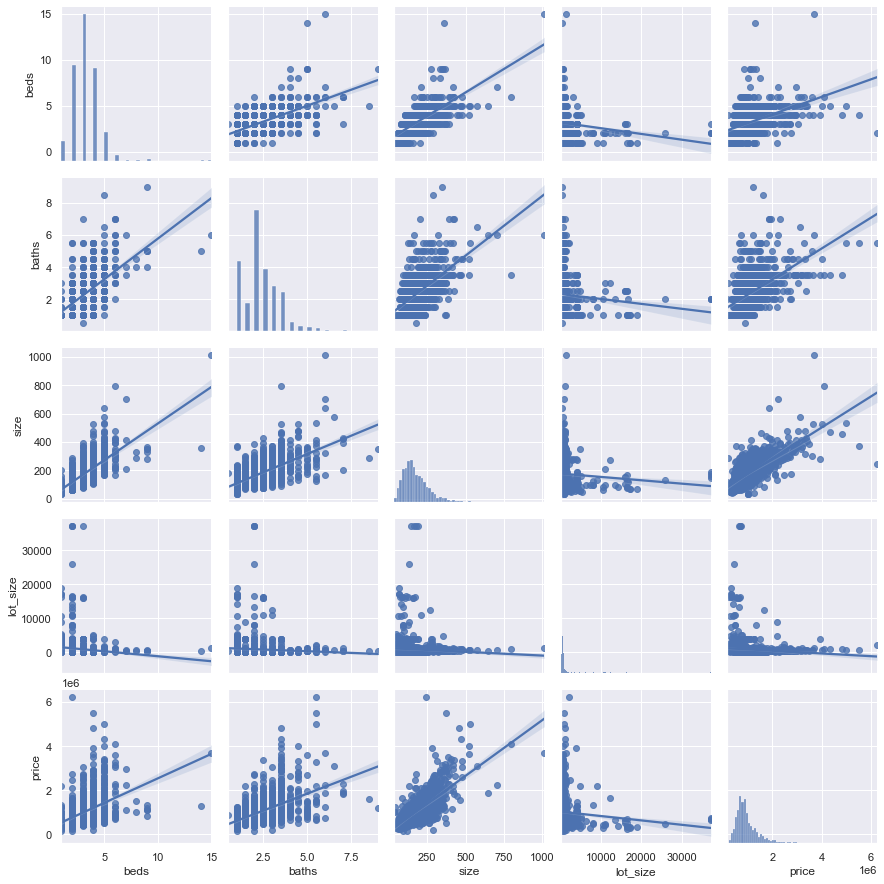

In [103]:
sns.pairplot(new_train,kind="reg")

In [104]:
X_train=new_train.loc[:,["beds","baths","size"]]
y_train=new_train.loc[:,"price"]

In [105]:
X_train.shape,y_train.shape,test.shape

((1655, 3), (1655,), (355, 5))

In [106]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [107]:
test.head()

,beds,baths,size,lot_size,price
0,3,3.0,262.200,5.078400e+01,1175000.0
1,4,5.0,279.680,1.154147e+02,1057500.0
2,3,1.0,118.680,3.201931e+01,799000.0
3,3,2.0,217.120,1.926301e+06,565000.0
4,2,2.0,88.596,3.723056e+02,701000.0


In [108]:
X_test=test.loc[:,["beds","baths","size"]]
y_test=test.loc[:,"price"]

### Statsmodels

In [109]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
beds,-7.579e+04,1.03e+04,-7.326,0.000,-9.61e+04,-5.55e+04
baths,1.272e+05,1.15e+04,11.072,0.000,1.05e+05,1.5e+05
size,5367.2356,168.196,31.911,0.000,5037.336,5697.135


### Scikit-learn mode

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [112]:
model.intercept_

172424.2280613915

In [113]:
model.coef_

array([-110099.60653289,  104943.18893893,    5399.47278076])

In [114]:
print("Train Error: " + str(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))

Train Error: 367856.8641238512


In [115]:
print("Model score: "+str(model.score(X_train, y_train)))

Model score: 0.5879736753225758


In [116]:
lineer_regression_score=model.score(X_train, y_train)
lineer_regression_score

0.5879736753225758

In [117]:
print("Train Error: " + str(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))

Train Error: 447555.8158656104


In [118]:
print("Model score: "+str(model.score(X_test, y_test)))

Model score: 0.5030876967282694


### Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

In [120]:
regressor_rf.fit(X_train, y_train)
feature_importances = regressor_rf.feature_importances_
feature_importance_dict = dict(zip(["beds","bath","size"], feature_importances))
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

size: 0.8123761192794835
bath: 0.10743378397247834
beds: 0.08019009674803822


In [121]:
lr_normal_rf = regressor_rf.score(X_train, y_train)
lr_normal_rf_test = regressor_rf.score(X_test, y_test)

In [122]:
lr_normal_rf

0.9199778212522465

In [123]:
lr_normal_rf_test

0.5306438669218716

### SVR

In [124]:
from sklearn.svm import SVR

In [125]:
regressor_svr_linear = SVR(kernel = 'linear')

In [126]:
regressor_svr_linear.fit(X_train, y_train.ravel())

SVR(kernel='linear')

In [127]:
standard_svm_linear = regressor_svr_linear.score(X_train, y_train)
standard_svm_linear_test = regressor_svr_linear.score(X_test, y_test)

In [128]:
standard_svm_linear

0.542440379954285

In [129]:
standard_svm_linear_test

0.45830659582122857